In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [74]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [75]:
x_train.shape

(60000, 28, 28)

In [77]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [79]:
x_train.shape

(60000, 28, 28)

In [80]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [81]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)  # Model training

Epoch 1/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.3147 - accuracy: 0.9120 - val_loss: 0.1810 - val_accuracy: 0.9458
Epoch 2/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.1580 - accuracy: 0.9544 - val_loss: 0.1447 - val_accuracy: 0.9558
Epoch 3/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.1144 - accuracy: 0.9660 - val_loss: 0.1146 - val_accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.0898 - accuracy: 0.9737 - val_loss: 0.1019 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.0960 - val_accuracy: 0.9715
Epoch 6/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0616 - accuracy: 0.9809 - val_loss: 0.0961 - val_accuracy: 0.9713
Epoch 7/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.1015 -

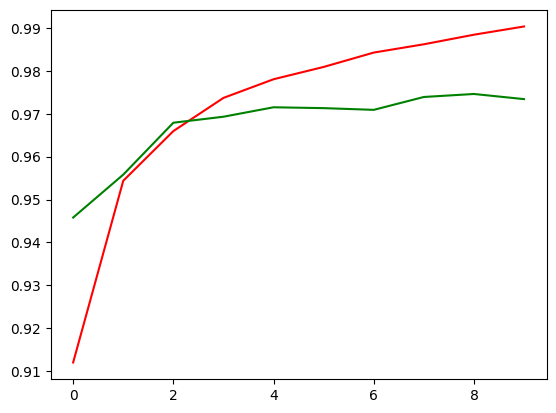

In [83]:
plt.plot(history.history['accuracy'], c='r')
plt.plot(history.history['val_accuracy'], c='g')


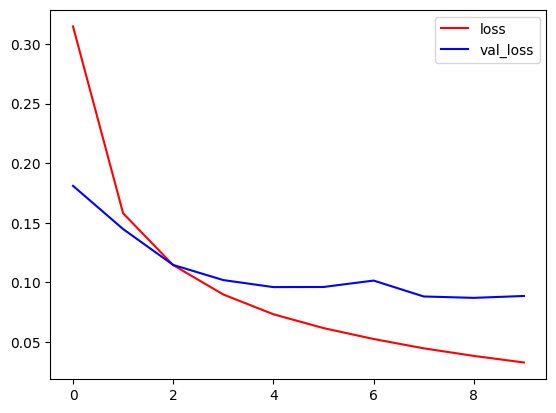

In [84]:
plt.plot(history.history['loss'], label = 'loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

In [85]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 420us/step - loss: 0.0886 - accuracy: 0.9734
